In [1]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib
%matplotlib inline
import input_data
import numpy

In [2]:
# Import MINST data
import input_data
mnist = input_data.read_data_sets("/tmp/data/", one_hot=True)

Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/gzip.py:275: VisibleDeprecationWarning: converting an array with ndim > 0 to an index will result in an error in the future
  chunk = self.extrabuf[offset: offset + size]
input_data.py:35: VisibleDeprecationWarning: converting an array with ndim > 0 to an index will result in an error in the future
  data = data.reshape(num_images, rows, cols, 1)


In [3]:
import tensorflow as tf

In [4]:
# Parameters
learning_rate = 0.001
training_epochs = 15
batch_size = 100
display_step = 1

In [5]:
# Network Parameters
n_hidden_1 = 256 # 1st layer num features
n_hidden_2 = 256 # 2nd layer num features
n_input = 784 # MNIST data input (img shape: 28*28)
n_classes = 10 # MNIST total classes (0-9 digits)

In [6]:
# tf Graph input
x = tf.placeholder("float", [None, n_input])
y = tf.placeholder("float", [None, n_classes])

In [7]:
# Store layers weight & bias
weights = {
    'h1': tf.Variable(tf.random_normal([n_input, n_hidden_1])),
    'h2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_hidden_2, n_classes]))
}
biases = {
    'b1': tf.Variable(tf.random_normal([n_hidden_1])),
    'b2': tf.Variable(tf.random_normal([n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_classes]))
}

In [17]:
sess = tf.Session()
summary_writer = tf.train.SummaryWriter('./log/', sess.graph)
sess.run(tf.initialize_all_variables())

In [18]:
layer1 = tf.nn.relu(tf.add(tf.matmul(x, weights['h1']),biases['b1']))
layer2 = tf.nn.relu(tf.add(tf.matmul(layer1,weights['h2']),biases['b2']))
output = tf.add(tf.matmul(layer2,weights['out']),biases['out'])
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(output,y))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(cost) 
# tf.summary.scalar('cost', cost)
# merged = tf.merge_all_summaries()


In [25]:
cost_records = []
for _ in range(100):
    for i in range(mnist.train.num_examples/batch_size):
        images , labels = mnist.train.next_batch(batch_size)
#         tf.image_summary('input', images, 10)

        cost_value,_ = sess.run([cost,optimizer],feed_dict={x:images,y:labels})
        cost_records.append(cost_value)
        
#     print sess.run(cost,feed_dict={x:mnist.test.images,y:mnist.test.labels})
    print sess.run(tf.reduce_mean(tf.cast(tf.equal(tf.arg_max(output,1),tf.arg_max(y,1)) ,'float')) ,
         feed_dict={x:mnist.test.images,y:mnist.test.labels})

0.9237
0.9253
0.9255
0.9236
0.925
0.926
0.9264
0.9244
0.9256
0.9256
0.9272
0.928
0.9285
0.9279
0.9285
0.928
0.9286
0.9294
0.9285
0.9295
0.9299
0.9306
0.9307
0.9309
0.9313
0.9316
0.9294
0.9298
0.9314
0.9304
0.9321
0.9317
0.9314
0.9318
0.9311
0.9306
0.9307
0.9311
0.931
0.9295
0.9313
0.9313
0.9314
0.9327
0.931
0.9316
0.9317
0.9317
0.9305
0.9309
0.9321
0.932
0.9324
0.9331
0.9312
0.9323
0.9319
0.9318
0.9321
0.9315
0.9313
0.9328
0.9321
0.9316
0.9314
0.9317
0.932
0.9318
0.9315
0.9317
0.9322
0.9314
0.9312
0.9324
0.9319
0.9331
0.9323
0.9326
0.9328
0.933
0.9323
0.9317
0.9327
0.933
0.9321
0.932
0.9315
0.9328
0.9317
0.9305
0.9321
0.9323
0.9314
0.9319
0.9322
0.932
0.9322
0.9324
0.9318
0.9327


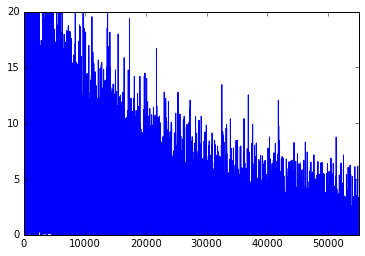

In [26]:
plt.axis([0, len(cost_records), 0, 20])
plt.plot(cost_records)
plt.show()
